In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pingouin as pg
from urllib.parse import urlencode
import io
import urllib
import requests
import json
import pingouin as pg
import warnings

sns.set_style('whitegrid')
%matplotlib inline

Загрузим данные и проведём с ними предобработку: колонки с датой переведём в datetime, посмотрим на пропущенные значения,
посмотрим за какой период представлен датасет с заказами, проверим повторяющиеся строки(уникальность order_id)

In [2]:
def read_df_API(key, delimiter): # Функция для считывания данных с ЯДиска
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    public_key = key  

    # Получаем загрузочную ссылку
    final_url = base_url + urlencode(dict(public_key=public_key))
    response = requests.get(final_url)
    download_url = response.json()['href']

    # Загружаем файл и сохраняем его
    download_response = requests.get(download_url)
    file_content = download_response.content
    string_data = file_content.decode('utf-8')
    data_io = io.StringIO(string_data)
    df = pd.read_csv(data_io, sep = delimiter)
    return df

In [3]:
key = 'https://disk.yandex.ru/d/prdO8FDQx7lzCg'
delimiter = ','
ab_orders = read_df_API(key, delimiter)
ab_orders

,order_id,creation_time,product_ids
0,1255,2022-08-26 00:00:19.000000,"{75, 22, 53, 84}"
1,1256,2022-08-26 00:02:21.000000,"{56, 76, 39}"
2,1257,2022-08-26 00:02:27.000000,"{76, 34, 41, 38}"
3,1258,2022-08-26 00:02:56.000000,"{74, 6}"
4,1259,2022-08-26 00:03:37.000000,"{20, 45, 67, 26}"
...,...,...,...
4118,59422,2022-09-08 23:13:03.000000,"{84, 8, 24}"
4119,59439,2022-09-08 23:18:05.000000,"{9, 25, 75, 30, 6}"
4120,59464,2022-09-08 23:22:27.000000,"{60, 41, 46}"
4121,59487,2022-09-08 23:29:06.000000,"{9, 62, 77}"


In [4]:
ab_orders.dtypes

order_id          int64
creation_time    object
product_ids      object
dtype: object

In [5]:
ab_orders.creation_time = pd.to_datetime(ab_orders.creation_time)
ab_orders.head()

,order_id,creation_time,product_ids
0,1255,2022-08-26 00:00:19,"{75, 22, 53, 84}"
1,1256,2022-08-26 00:02:21,"{56, 76, 39}"
2,1257,2022-08-26 00:02:27,"{76, 34, 41, 38}"
3,1258,2022-08-26 00:02:56,"{74, 6}"
4,1259,2022-08-26 00:03:37,"{20, 45, 67, 26}"


In [6]:
ab_orders.product_ids = ab_orders.product_ids.apply(lambda x: x.replace('{', '').replace('}', '').split(','))
# первращаем данные в колонке product_ids в список

In [7]:
ab_orders.isna().sum()

order_id         0
creation_time    0
product_ids      0
dtype: int64

In [8]:
ab_orders.head()

,order_id,creation_time,product_ids
0,1255,2022-08-26 00:00:19,"[75, 22, 53, 84]"
1,1256,2022-08-26 00:02:21,"[56, 76, 39]"
2,1257,2022-08-26 00:02:27,"[76, 34, 41, 38]"
3,1258,2022-08-26 00:02:56,"[74, 6]"
4,1259,2022-08-26 00:03:37,"[20, 45, 67, 26]"


In [9]:
key = 'https://disk.yandex.ru/d/atwrlmB_wu-fHA' 
delimiter = ','
ab_products = read_df_API(key, delimiter)
ab_products

,product_id,name,price
0,1,сахар,150.0
1,2,чай зеленый в пакетиках,50.0
2,3,вода негазированная,80.4
3,4,леденцы,45.5
4,5,кофе 3 в 1,15.0
...,...,...,...
82,83,вафли,55.0
83,84,мандарины,90.4
84,85,варенье,200.3
85,86,кофе холодный,70.3


In [10]:
ab_products.shape

(87, 3)

In [11]:
ab_products.dtypes

product_id      int64
name           object
price         float64
dtype: object

In [12]:
ab_products.isna().sum()

product_id    0
name          0
price         0
dtype: int64

In [13]:
key = 'https://disk.yandex.ru/d/4qY27tJ23G_B1g' 
ab_users_data = read_df_API(key, delimiter)
ab_users_data.head()

,user_id,order_id,action,time,date,group
0,964,1255,create_order,2022-08-26 00:00:19.000000,2022-08-26,0
1,965,1256,create_order,2022-08-26 00:02:21.000000,2022-08-26,1
2,964,1257,create_order,2022-08-26 00:02:27.000000,2022-08-26,0
3,966,1258,create_order,2022-08-26 00:02:56.000000,2022-08-26,0
4,967,1259,create_order,2022-08-26 00:03:37.000000,2022-08-26,1


In [14]:
ab_users_data.isna().sum()

user_id     0
order_id    0
action      0
time        0
date        0
group       0
dtype: int64

In [15]:
ab_users_data.date = pd.to_datetime(ab_users_data.date)
ab_users_data.dtypes

user_id              int64
order_id             int64
action              object
time                object
date        datetime64[ns]
group                int64
dtype: object

In [16]:
ab_users_data.head()

,user_id,order_id,action,time,date,group
0,964,1255,create_order,2022-08-26 00:00:19.000000,2022-08-26,0
1,965,1256,create_order,2022-08-26 00:02:21.000000,2022-08-26,1
2,964,1257,create_order,2022-08-26 00:02:27.000000,2022-08-26,0
3,966,1258,create_order,2022-08-26 00:02:56.000000,2022-08-26,0
4,967,1259,create_order,2022-08-26 00:03:37.000000,2022-08-26,1


In [17]:
ab_users_data.time.max() # Последняя дата датафрейма

'2022-09-08 23:41:24.000000'

In [18]:
ab_users_data.time.min() # Первая дата датафрейма

'2022-08-26 00:00:19.000000'

In [19]:
ab_users_data.shape

(4337, 6)

In [20]:
ab_users_data.order_id.nunique()

4123

In [21]:
ab_users_data.action.value_counts()

action
create_order    4123
cancel_order     214
Name: count, dtype: int64

Факт на который следует обратить внимание: в датасете с заказами есть и отменённые заказы.

Основные метрики в сравнении групп в данном датасете : средний чек, общий объем выручки

In [22]:
ab_orders_explode = ab_orders.explode('product_ids').rename(columns = {'product_ids' : 'product_id'})
ab_orders_explode.product_id = pd.to_numeric(ab_orders_explode.product_id)
ab_orders_explode.head()
#"Разрываем" колонку со списком закзов по строкам для составления финального датафрейма, чтобы подсчитать метрики 

,order_id,creation_time,product_id
0,1255,2022-08-26 00:00:19,75
0,1255,2022-08-26 00:00:19,22
0,1255,2022-08-26 00:00:19,53
0,1255,2022-08-26 00:00:19,84
1,1256,2022-08-26 00:02:21,56


In [23]:
ab_orders_explode.dtypes

order_id                  int64
creation_time    datetime64[ns]
product_id                int64
dtype: object

In [24]:
ab_orders_explode = ab_orders_explode.merge(ab_products, on = 'product_id', how = 'left')
ab_orders_explode.head()

,order_id,creation_time,product_id,name,price
0,1255,2022-08-26 00:00:19,75,сок ананасовый,120.0
1,1255,2022-08-26 00:00:19,22,сок мультифрукт,120.0
2,1255,2022-08-26 00:00:19,53,мука,78.3
3,1255,2022-08-26 00:00:19,84,мандарины,90.4
4,1256,2022-08-26 00:02:21,56,сосиски,150.0


In [25]:
ab_orders_explode.isna().sum()

order_id         0
creation_time    0
product_id       0
name             0
price            0
dtype: int64

In [26]:
ab_order_fin = ab_orders_explode.groupby('order_id', as_index = False).agg({'product_id' : 'count', 'price' : 'sum'})

Подготавливем общий датафрейм AB-тестирования.

In [27]:
ab_fin_pre = ab_users_data.merge(ab_order_fin, on = 'order_id', how = 'left')
ab_fin_pre.head()

,user_id,order_id,action,time,date,group,product_id,price
0,964,1255,create_order,2022-08-26 00:00:19.000000,2022-08-26,0,4,408.7
1,965,1256,create_order,2022-08-26 00:02:21.000000,2022-08-26,1,3,250.5
2,964,1257,create_order,2022-08-26 00:02:27.000000,2022-08-26,0,4,310.2
3,966,1258,create_order,2022-08-26 00:02:56.000000,2022-08-26,0,2,85.0
4,967,1259,create_order,2022-08-26 00:03:37.000000,2022-08-26,1,4,228.0


In [28]:
list_cancel = ab_fin_pre.query('action == "cancel_order"').order_id.to_list()
# Подготавливаем список с отмененными заказами и исключаем их из датафрейма

In [29]:
ab_fin = ab_fin_pre.loc[ab_fin_pre.order_id.isin(list_cancel) == False]
# Исключаем из общего датасета заказы, которые были отменены

In [30]:
ab_fin.isna().sum()

user_id       0
order_id      0
action        0
time          0
date          0
group         0
product_id    0
price         0
dtype: int64

In [31]:
ab_fin.shape

(3909, 8)

In [32]:
ab_fin.groupby('group', as_index = False).agg({'product_id' : 'mean', 'price' : 'mean'})\
    .rename(columns = {'product_id' : 'all_items', 'price' :'cost_order'})

,group,all_items,cost_order
0,0,3.341847,382.092927
1,1,3.350126,368.861629


На основе полученных данных можно сделать вывод:  
1. Видимых различий в метрике "колличества позиций в заказе" - нет(эта метрика могла повлиять на средний чек).  
2. Средняя выручка заказа незначительно отличается в меньшую степень у тестовой группы.  
Чтобы отклонить нулевую гипотезу о равенстве выборок, проведем сравнение групп с помощью t-test

In [33]:
df0 = ab_fin.loc[ab_fin.group == 0]

In [34]:
df1 = ab_fin.loc[ab_fin.group == 1]

C:\Users\OlegK\AppData\Local\Temp\ipykernel_26068\3416092485.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df0.price)
C:\Users\OlegK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\OlegK\AppData\Local\Temp\ipykernel_26068\3416092485.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) o

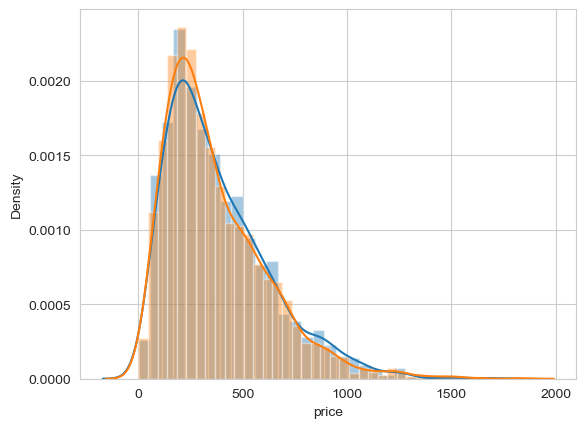

In [35]:
sns.distplot(df0.price)
sns.distplot(df1.price)
warnings.filterwarnings('ignore')

<Axes: xlabel='group', ylabel='price'>

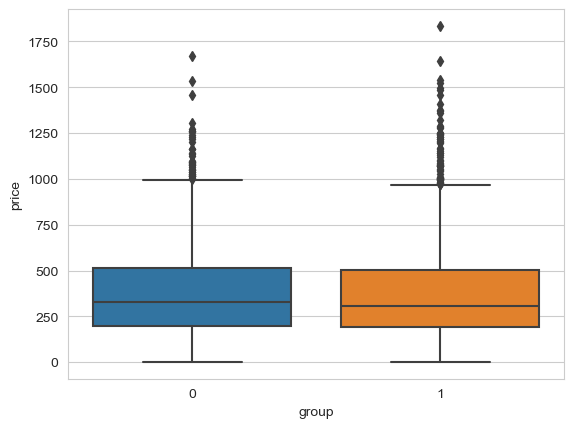

In [36]:
sns.boxplot(x="group", y="price", data=ab_fin)

Визуально распределение не кажется нормальным. Попробуем  проверить выборки на нормальность

In [37]:
pg.normality(data=ab_fin, dv="price", group="group", method="normaltest")

,W,pval,normal
group,,,
0,276.039777,1.144785e-60,False
1,586.947838,3.514766e-128,False


Тест показывает, что распределение ненормально(много выбросов, это хорошо видно на графике с боксплотами). Но, в связи с тем, что выборки у нас большие по объёму, даже при ненормальном распределнии можно использовать t-test. Итак:  

H₀: Между средними нет статистически значимых различий.(Нулевая гипотеза).  
H₁: Статистически значимые различия есть.(Альтернативная гипотеза)


In [38]:
stats.ttest_ind(df0.price, df1.price)

TtestResult(statistic=1.6334875192269402, pvalue=0.10244707728234669, df=3907.0)

Мы видим, что значение pValue больше 0.05, что не позволяет отклонить нам нулевую гипотезу, о статистически значимых различиях между группами.

Можно проверить: изменилось ли соотношение отклоненных заказов. 

In [39]:
ab_cancel = pd.pivot_table(ab_fin_pre, index = 'group', columns = ['action'], values ='price', aggfunc = 'count', margins = True)
ab_cancel

action,cancel_order,create_order,All
group,,,
0,82,1609,1691
1,132,2514,2646
All,214,4123,4337


In [40]:
ab_cancel['cancel_rate'] = ab_cancel['cancel_order'] / ab_cancel['All']

def highlight_column(s):
    color = 'yellow'  
    return ['background-color: %s' % color] * len(s)

styled_ab_cancel = ab_cancel.style.apply(highlight_column, subset=pd.IndexSlice[:, 'cancel_rate'])
styled_ab_cancel

action,cancel_order,create_order,All,cancel_rate
group,,,,
0,82,1609,1691,0.048492
1,132,2514,2646,0.049887
All,214,4123,4337,0.049343


Получает табличку конверсии отклонённых заказов. Видно, что система рекомендации товаров никак не влияет на конверсию отклонённых заказов. Применим критерий Хи-квадрат, чтобы статистически доказать или опровергнуть это утверждение.

In [41]:
cross_cancel_for_chi = pd.crosstab(ab_fin_pre.group, ab_fin_pre.action)
cross_cancel_for_chi

action,cancel_order,create_order
group,,
0,82,1609
1,132,2514


H₀: Взаимосвязи между переменными нет, т.е. количество отмененных заказов не зависит от принадлежности к группе.(Нулевая гипотеза).
H₁: Взаимосвязь есть, т.е. количество отмененных заказов зависит от принадлежности к группе.(Альтернативная гипотеза).

In [42]:
stat, p, dof, expected = stats.chi2_contingency(cross_cancel_for_chi)
stat, p

(0.018211165651942023, 0.8926523935841298)

По результатам теста Хи-квадрат, мы не можем отклонить нулевую гипотезу.

**Итак, что мы имеем:**   
Количство позиций в заказе, средний чек и конверсия отмененных заказов не зависят от того, какая система рекомендации товаров применялась.  
А теперь можно посмотреть на то, как изменилась общая выручка.

In [53]:
ab_total_revenue = ab_fin.groupby('group', as_index = False).agg({'order_id': 'count','price': 'sum'}).rename(columns={'order_id': 'count_orders', 'price': 'total_revenue'})
styled_ab_revenue = ab_total_revenue.style.apply(highlight_column, subset=pd.IndexSlice[:, 'total_revenue'])
styled_ab_revenue

,group,count_orders,total_revenue
0,0,1527,583455.900000
1,1,2382,878628.400000


В представленной таблице видно, что при новой системе рекомендации люди чаще покупают, а значит, общая выручка больше.(при условии равенства среднего чека.) 

#### ВЫВОД:   
Анализ результатов АВ-тестировние показал: включать новую систему рекомендаций необходимо. Выручка значительно выросла.